<a href="https://colab.research.google.com/github/blocky00/Python-Experimentierfabrik/blob/master/AssemblyAI_Models_Quickstarts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.assemblyai.com/">
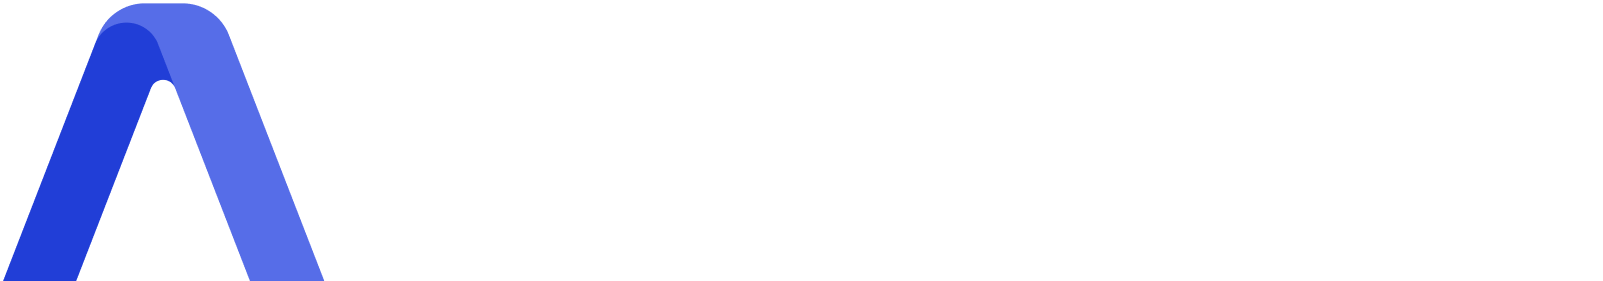
</a>
</img>

# AssemblyAI Models Quickstart Examples

The below code samples are pulled from the corresponding sections of the [AssemblyAI Documentation](https://www.assemblyai.com/docs/)

## Installation

Install the [AssemblyAI Python SDK](https://github.com/AssemblyAI/assemblyai-python-sdk)

In [ ]:
!pip install assemblyai;

## Speech-to-Text

### Speech Recognition

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

transcriber = aai.Transcriber()

transcript = transcriber.transcribe(audio_url)

print(transcript.text)

Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US. Skylines from Maine to Maryland to Minnesota are gray and smoggy. And in some places, the air quality warnings include the warning to stay inside. We wanted to better understand what's happening here and why, so we called Peter DiCarlo, an associate professor in the Department of Environmental Health and Engineering at Johns Hopkins University. Good morning, professor. Good morning. So what is it about the conditions right now that have caused this round of wildfires to affect so many people so far away? Well, there's a couple of things. The season has been pretty dry already, and then the fact that we're getting hit in the US. Is because there's a couple of weather systems that are essentially channeling the smoke from those Canadian wildfires through Pennsylvania into the Mid Atlantic and the Northeast and kind of just dropping the smoke there. So what is it in this haze that makes it harmf

The transcript contains an array of all transcribed words together with start and end time and confidence. Here's how you can get word-level timestamps across the entire transcript:

In [ ]:
print(transcript.words)

[Word(text='Smoke', start=250, end=650, confidence=0.73033), Word(text='from', start=730, end=1022, confidence=0.99996), Word(text='hundreds', start=1076, end=1466, confidence=0.99992), Word(text='of', start=1498, end=1646, confidence=1.0), Word(text='wildfires', start=1668, end=2346, confidence=0.98418), Word(text='in', start=2378, end=2526, confidence=0.99989), Word(text='Canada', start=2548, end=3130, confidence=0.99436), Word(text='is', start=3210, end=3454, confidence=0.99898), Word(text='triggering', start=3492, end=3946, confidence=0.99997), Word(text='air', start=3978, end=4222, confidence=0.99867), Word(text='quality', start=4276, end=4590, confidence=1.0), Word(text='alerts', start=4660, end=5114, confidence=0.98108), Word(text='throughout', start=5162, end=5466, confidence=0.99996), Word(text='the', start=5498, end=5694, confidence=1.0), Word(text='US.', start=5732, end=6350, confidence=0.81), Word(text='Skylines', start=6500, end=7306, confidence=0.99817), Word(text='from',

And here's how to get a list of all sentences and paragraphs in the transcript:

In [ ]:
sentences = transcript.get_sentences()
for sentence in sentences:
  print(sentence)

text='Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US.' start=250 end=6350 confidence=0.73033 words=[Word(text='Smoke', start=250, end=650, confidence=0.73033), Word(text='from', start=730, end=1022, confidence=0.99996), Word(text='hundreds', start=1076, end=1466, confidence=0.99992), Word(text='of', start=1498, end=1646, confidence=1.0), Word(text='wildfires', start=1668, end=2346, confidence=0.98418), Word(text='in', start=2378, end=2526, confidence=0.99989), Word(text='Canada', start=2548, end=3130, confidence=0.99436), Word(text='is', start=3210, end=3454, confidence=0.99898), Word(text='triggering', start=3492, end=3946, confidence=0.99997), Word(text='air', start=3978, end=4222, confidence=0.99867), Word(text='quality', start=4276, end=4590, confidence=1.0), Word(text='alerts', start=4660, end=5114, confidence=0.98108), Word(text='throughout', start=5162, end=5466, confidence=0.99996), Word(text='the', start=5498, end=5694, confidence

In [ ]:
paragraphs = transcript.get_paragraphs()
for paragraph in paragraphs:
  print(paragraph.text)

You can export completed transcripts in SRT or VTT format, which can be used for subtitles and closed captions in videos.

You can also customize the maximum number of characters per caption by specifying the `chars_per_caption` parameter.

In [ ]:
srt = transcript.export_subtitles_srt()
srt = transcript.export_subtitles_srt(chars_per_caption=32)

vtt =transcript.export_subtitles_vtt()
vtt =transcript.export_subtitles_vtt(chars_per_caption=32)

### Speaker Diarization

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_KEY_HERE"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(
  speaker_labels=True,
)

transcript = aai.Transcriber().transcribe(audio_url, config)

for utterance in transcript.utterances:
  print(f"Speaker {utterance.speaker}: {utterance.text}")

Speaker A: Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US. Skylines from Maine to Maryland to Minnesota are gray and smoggy. And in some places, the air quality warnings include the warning to stay inside. We wanted to better understand what's happening here and why, so we called Peter DiCarlo, an associate professor in the department of Environmental Health and Engineering at Johns Hopkins University. Good morning. Professor good morning. So what is it about the conditions right now that have caused this round of wildfires to affect so many people so far away?
Speaker B: Well, there's a couple of things. The season has been pretty dry already, and then the fact that we're getting hit in the US is because there's a couple of weather systems that are essentially channeling the smoke from those canadian wildfires through Pennsylvania into the mid Atlantic and the northeast and kind of just dropping the smoke there.
Speaker A: So what is it i

## Audio Intelligence

### Summarization

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_KEY_HERE"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(
  summarization=True,
  summary_model=aai.SummarizationModel.informative,
  summary_type=aai.SummarizationType.bullets
)

transcript = aai.Transcriber().transcribe(audio_url, config)

print(transcript.summary)

- Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US. Skylines from Maine to Maryland to Minnesota are gray and smoggy. In some places, the air quality warnings include the warning to stay inside.
- Most of that is due to what's called particulate matter, which can get into your lungs. Exposure to high levels can lead to a host of health problems. Who tends to be vulnerable in a situation like this? It's the youngest. Will we be seeing more of these kinds of wide ranging air quality consequences?


### Content Moderation

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(content_safety=True)

transcript = aai.Transcriber().transcribe(audio_url, config)

# Get the parts of the transcript which were flagged as sensitive
for result in transcript.content_safety.results:
    print(result.text)
    print(f"Timestamp: {result.timestamp.start} - {result.timestamp.end}")

    # Get category, confidence, and severity
    for label in result.labels:
      print(f"{label.label} - {label.confidence} - {label.severity}")  # content safety category

# Get the confidence of the most common labels in relation to the entire audio file
for label, confidence in transcript.content_safety.summary.items():
    print(f"{confidence * 100}% confident that the audio contains {label}")

# Get the overall severity of the most common labels in relation to the entire audio file
for label, severity_confidence in transcript.content_safety.severity_score_summary.items():
    print(f"{severity_confidence.low * 100}% confident that the audio contains low-severity {label}")
    print(f"{severity_confidence.medium * 100}% confident that the audio contains mid-severity {label}")
    print(f"{severity_confidence.high * 100}% confident that the audio contains high-severity {label}")

Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US. Skylines from Maine to Maryland to Minnesota are gray and smoggy. And in some places, the air quality warnings include the warning to stay inside. We wanted to better understand what's happening here and why, so we called Peter DiCarlo, an associate professor in the Department of Environmental Health and Engineering at Johns Hopkins University. Good morning, professor. Good morning.
Timestamp: 250 - 28920
disasters, 0.8141809105873108, 0.40141189098358154
So what is it about the conditions right now that have caused this round of wildfires to affect so many people so far away? Well, there's a couple of things. The season has been pretty dry already, and then the fact that we're getting hit in the US. Is because there's a couple of weather systems that are essentially channeling the smoke from those Canadian wildfires through Pennsylvania into the Mid Atlantic and the Northeast and kind of jus

In [ ]:
# Get the parts of the transcript which were flagged as sensitive
for result in transcript.content_safety.results:
    print(result.text)
    print(f"Timestamp: {result.timestamp.start} - {result.timestamp.end}")

    # Get category, confidence, and severity
    for label in result.labels:
      print(f"{label.label} - {label.confidence} - {label.severity}")  # content safety category
    print()

# Get the confidence of the most common labels in relation to the entire audio file
for label, confidence in transcript.content_safety.summary.items():
    print(f"{confidence * 100}% confident that the audio contains {label}")

print()

# Get the overall severity of the most common labels in relation to the entire audio file
for label, severity_confidence in transcript.content_safety.severity_score_summary.items():
    print(f"{severity_confidence.low * 100}% confident that the audio contains low-severity {label}")
    print(f"{severity_confidence.medium * 100}% confident that the audio contains mid-severity {label}")
    print(f"{severity_confidence.high * 100}% confident that the audio contains high-severity {label}")

Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US. Skylines from Maine to Maryland to Minnesota are gray and smoggy. And in some places, the air quality warnings include the warning to stay inside. We wanted to better understand what's happening here and why, so we called Peter DiCarlo, an associate professor in the Department of Environmental Health and Engineering at Johns Hopkins University. Good morning, professor. Good morning.
Timestamp: 250 - 28920
disasters - 0.8141809105873108 - 0.40141189098358154

So what is it about the conditions right now that have caused this round of wildfires to affect so many people so far away? Well, there's a couple of things. The season has been pretty dry already, and then the fact that we're getting hit in the US. Is because there's a couple of weather systems that are essentially channeling the smoke from those Canadian wildfires through Pennsylvania into the Mid Atlantic and the Northeast and kind of 

### Sentiment Analysis

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(sentiment_analysis=True)

transcript = aai.Transcriber().transcribe(audio_url, config)

for sentiment_result in transcript.sentiment_analysis:
    print(sentiment_result.text)
    print(sentiment_result.sentiment)  # POSITIVE, NEUTRAL, or NEGATIVE
    print(sentiment_result.confidence)
    print(f"Timestamp: {sentiment_result.start} - {sentiment_result.end}")

Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US.
SentimentType.negative
0.8181032538414001
Timestamp: 250 - 6350
Skylines from Maine to Maryland to Minnesota are gray and smoggy.
SentimentType.negative
0.5900681018829346
Timestamp: 6500 - 11050
And in some places, the air quality warnings include the warning to stay inside.
SentimentType.neutral
0.5371454358100891
Timestamp: 11130 - 15614
We wanted to better understand what's happening here and why, so we called Peter DiCarlo, an associate professor in the Department of Environmental Health and Engineering at Johns Hopkins University.
SentimentType.neutral
0.7851245403289795
Timestamp: 15812 - 25426
Good morning, professor.
SentimentType.positive
0.8253470659255981
Timestamp: 25578 - 26950
Good morning.
SentimentType.positive
0.7193589210510254
Timestamp: 27850 - 28920
So what is it about the conditions right now that have caused this round of wildfires to affect so many people so far away?

### Entity Detection

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(entity_detection=True)

transcript = aai.Transcriber().transcribe(audio_url, config)

for entity in transcript.entities:
    print(entity.text)
    print(entity.entity_type)
    print(f"Timestamp: {entity.start} - {entity.end}\n")

Canada
EntityType.location
Timestamp: 2548 - 3130

the US
EntityType.location
Timestamp: 5498 - 6350

Maine
EntityType.location
Timestamp: 7572 - 7962

Maryland
EntityType.location
Timestamp: 8228 - 8650

Minnesota
EntityType.location
Timestamp: 8948 - 9610

Peter DiCarlo
EntityType.person_name
Timestamp: 18948 - 20010

associate professor
EntityType.occupation
Timestamp: 20308 - 21226

Department of Environmental Health and Engineering
EntityType.organization
Timestamp: 21508 - 23706

Johns Hopkins University
EntityType.organization
Timestamp: 23972 - 25426

professor
EntityType.occupation
Timestamp: 26076 - 26950

the US
EntityType.location
Timestamp: 45184 - 45946

Canadian
EntityType.nationality
Timestamp: 49728 - 50086

Pennsylvania
EntityType.location
Timestamp: 51696 - 52326

Mid Atlantic
EntityType.location
Timestamp: 52624 - 53178

Northeast
EntityType.location
Timestamp: 53364 - 53914

Baltimore
EntityType.location
Timestamp: 65064 - 65534

science
EntityType.occupation
Times

### PII Redaction

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig().set_redact_pii(
    policies=[
        aai.PIIRedactionPolicy.person_name,
        aai.PIIRedactionPolicy.organization,
        aai.PIIRedactionPolicy.occupation,
    ],
    substitution=aai.PIISubstitutionPolicy.hash,
)

transcript = aai.Transcriber().transcribe(audio_url, config)

print(transcript.text)

Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US. Skylines from Maine to Maryland to Minnesota are gray and smoggy. And in some places, the air quality warnings include the warning to stay inside. We wanted to better understand what's happening here and why, so we called ##### #######, an ######### ######### in the ########## ## ############# ###### ### ########### at ##### ####### ##########. Good morning. ######### Good morning. So what is it about the conditions right now that have caused this round of wildfires to affect so many people so far away? Well, there's a couple of things. The season has been pretty dry already, and then the fact that we're getting hit in the US is because there's a couple of weather systems that are essentially channeling the smoke from those Canadian wildfires through Pennsylvania into the mid Atlantic and the northeast and kind of just dropping the smoke there. So what is it in this haze that makes it harmful

### Topic Detection

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(iab_categories=True)

transcript = aai.Transcriber().transcribe(audio_url, config)

# Get the parts of the transcript that were tagged with topics
for result in transcript.iab_categories.results:
    print(result.text)
    print(f"Timestamp: {result.timestamp.start} - {result.timestamp.end}")
    for label in result.labels:
        print(f"{label.label} ({label.relevance})")

# Get a summary of all topics in the transcript
for label, relevance in transcript.iab_categories.summary.items():
    print(f"Audio is {relevance * 100}% relevant to {label}")

Smoke from hundreds of wildfires in Canada is triggering air quality alerts throughout the US. Skylines from Maine to Maryland to Minnesota are gray and smoggy. And in some places, the air quality warnings include the warning to stay inside. We wanted to better understand what's happening here and why, so we called Peter DiCarlo, an associate professor in the Department of Environmental Health and Engineering at Johns Hopkins University. Good morning, professor. Good morning.
Timestamp: 250 - 28920
Home&Garden>IndoorEnvironmentalQuality (0.9881861209869385)
NewsAndPolitics>Weather (0.5561717748641968)
MedicalHealth>DiseasesAndConditions>LungAndRespiratoryHealth (0.00426860898733139)
NewsAndPolitics>Disasters (0.0034602025989443064)
BusinessAndFinance>Business>GreenSolutions (0.0025904506910592318)
MedicalHealth>DiseasesAndConditions>Cancer (0.0015328084118664265)
Science>Environment (0.001438859268091619)
Travel>TravelLocations>PolarTravel (0.0013438508613035083)
MedicalHealth>Diseases

### Auto Chapters

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(auto_chapters=True)

transcript = aai.Transcriber().transcribe(audio_url, config)

for chapter in transcript.chapters:
  print(f"{chapter.start}-{chapter.end}: {chapter.headline}")

250-28920: Smoke from hundreds of wildfires in Canada is triggering air quality alerts across US
29290-280340: Smoke from Canadian wildfires is impacting the Mid Atlantic and Northeast region


### Key Phrases

To run the code below, simply paste your [API key](https://www.assemblyai.com/app) into the string for the `YOUR_API_KEY` variable below, and then press the "Play" button in the top-left hand corner of the cell.

If you do not yet have an API token, you can get one for free [here](https://www.assemblyai.com/dashboard/signup).

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

audio_url = "https://github.com/AssemblyAI-Examples/audio-examples/raw/main/20230607_me_canadian_wildfires.mp3"

config = aai.TranscriptionConfig(auto_highlights=True)

transcript = aai.Transcriber().transcribe(audio_url, config)

for result in transcript.auto_highlights.results:
    print(f"Highlight: {result.text}, Count: {result.count}, Rank: {result.rank}, Timestamps: {result.timestamps}")

Highlight: air quality alerts, Count: 1, Rank: 0.08, Timestamps: [Timestamp(start=3978, end=5114)]
Highlight: wide ranging air quality consequences, Count: 1, Rank: 0.08, Timestamps: [Timestamp(start=235388, end=238838)]
Highlight: more fires, Count: 1, Rank: 0.07, Timestamps: [Timestamp(start=184716, end=185186)]
Highlight: more wildfires, Count: 1, Rank: 0.07, Timestamps: [Timestamp(start=231036, end=232354)]
Highlight: air pollution, Count: 1, Rank: 0.07, Timestamps: [Timestamp(start=156004, end=156910)]
Highlight: weather systems, Count: 3, Rank: 0.07, Timestamps: [Timestamp(start=47344, end=47958), Timestamp(start=205268, end=205818), Timestamp(start=211588, end=213434)]
Highlight: high levels, Count: 2, Rank: 0.06, Timestamps: [Timestamp(start=121128, end=121646), Timestamp(start=155412, end=155866)]
Highlight: health conditions, Count: 1, Rank: 0.06, Timestamps: [Timestamp(start=152134, end=152666)]
Highlight: New York City, Count: 1, Rank: 0.06, Timestamps: [Timestamp(start=125

## LeMUR - LLMs for Speech

### Ask questions about your audio data

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_KEY_HERE"

# Step 1: Transcribe an audio file.
audio_url = "https://storage.googleapis.com/aai-web-samples/5_common_sports_injuries.mp3"

transcriber = aai.Transcriber()
transcript = transcriber.transcribe(audio_url)

# Step 2: Define a prompt with your question(s).
prompt = "What is a runner's knee?"

# Step 3: Apply LeMUR.
result = transcript.lemur.task(prompt)

print(result.response)


 Based on the transcript, runner's knee is a condition characterized by pain behind or around the kneecap. It is caused by overuse, muscle imbalance and inadequate stretching. Symptoms include pain under or around the kneecap and pain when walking.


### Summarize your audio data

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_KEY_HERE"

# Step 1: Transcribe an audio file.
audio_url = "https://storage.googleapis.com/aai-web-samples/5_common_sports_injuries.mp3"

transcriber = aai.Transcriber()
transcript = transcriber.transcribe(audio_url)

# Step 2: Define a summarization prompt.
prompt = "Provide a brief summary of the transcript."

# Step 3: Apply LeMUR.
result = transcript.lemur.task(prompt)

print(result.response)


 The transcript describes common sports injuries affecting the knee and ankle, including runner's knee, sprained ankle, meniscus tear, rotator cuff tear, and ACL tear. It provides definitions, causes, and symptoms for each injury. The transcript seems to be narrating sports footage and describing injuries sustained by the athletes. Overall, it focuses on explaining different types of sports-related injuries involving the knee, ankle, and shoulder joints.


### Extract and generate data

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_KEY_HERE"

# Step 1: Transcribe an audio file.
audio_url = "https://storage.googleapis.com/aai-web-samples/5_common_sports_injuries.mp3"

transcriber = aai.Transcriber()
transcript = transcriber.transcribe(audio_url)

# Step 2: Define a prompt to extract data.
prompt = "Extract injury and symptom of injury from the transcript."

# Step 3: Apply LeMUR.
result = transcript.lemur.task(prompt)

print(result.response)


 Here are the extracted injuries and symptoms:

Runner's knee
Injury: runner's knee 
Symptoms: pain behind or around the kneecap

Sprained ankle
Injury: sprained ankle
Symptoms: pain and difficulty moving the ankle, swelling around the ankle, bruising

Meniscus tear 
Injury: meniscus tear
Symptoms: stiffness and swelling, pain in your knee, catching or locking of your knee

Rotator cuff tear
Injury: rotator cuff tear
Symptoms: pain when lifting and lowering your arm, weakness when lifting or rotating your arm, pain when lying on the affected shoulder

ACL tear
Injury: ACL tear
Symptoms: severe pain and tenderness in knee, loss of full range of motion, swelling around the knee
